In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.express as px
import os
import time
IMAGES_FOLDER_PATH = "../images"

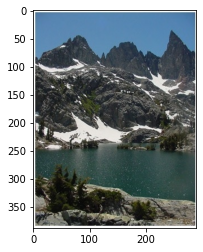

In [2]:
mountain = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'mountain.jpg'))
mountain = cv2.cvtColor(mountain,cv2.COLOR_BGR2RGB)
plt.imshow(mountain)
plt.show()

# Question 1

In [3]:
def bilateral_filter(img,k,sigma_s,sigma_v):

    h,w,_ = img.shape
    
    output = np.zeros([h,w,3])
    
    padding_img = np.zeros([h+k-1,w+k-1,3],dtype='int64')
    padding_img[int((k-1)/2):int(h+(k-1)/2),int((k-1)/2):int(w+(k-1)/2),0:3] = img
    spatial_kernel = np.zeros([k,k])
    
    center = int((k-1)/2)
    for i in range(k):
        for j in range(k):
            spatial_kernel[i][j] = np.exp(-(((i - center)**2 + (j-center)**2) / (2 * sigma_s * sigma_s)))
    
    for i in range(int((k-1)/2),h+int((k-1)/2)):
        for j in range(int((k-1)/2),w+int((k-1)/2)):     
            for layer in range(3):
                area_obs = padding_img[i-int((k-1)/2):i+int((k-1)/2)+1,j-int((k-1)/2):j+int((k-1)/2)+1,layer:layer+1].reshape(k,k)                
                value_kernel = padding_img[i-int((k-1)/2):i+int((k-1)/2)+1,j-int((k-1)/2):j+int((k-1)/2)+1,layer:layer+1].reshape(k,k) - padding_img[i][j][layer]
                value_kernel = np.exp(-(value_kernel*value_kernel)/(2*sigma_v*sigma_v))
                
                denominator = spatial_kernel * value_kernel
                numerator = area_obs*denominator

                output[i-int((k-1)/2)][j-int((k-1)/2)][layer] = int(sum(sum(numerator)) / sum(sum(denominator)))

    return np.int64(output)

In [4]:
filtered_1 = bilateral_filter(mountain,9,200,10)
filtered_2 = bilateral_filter(mountain,15,300,50)

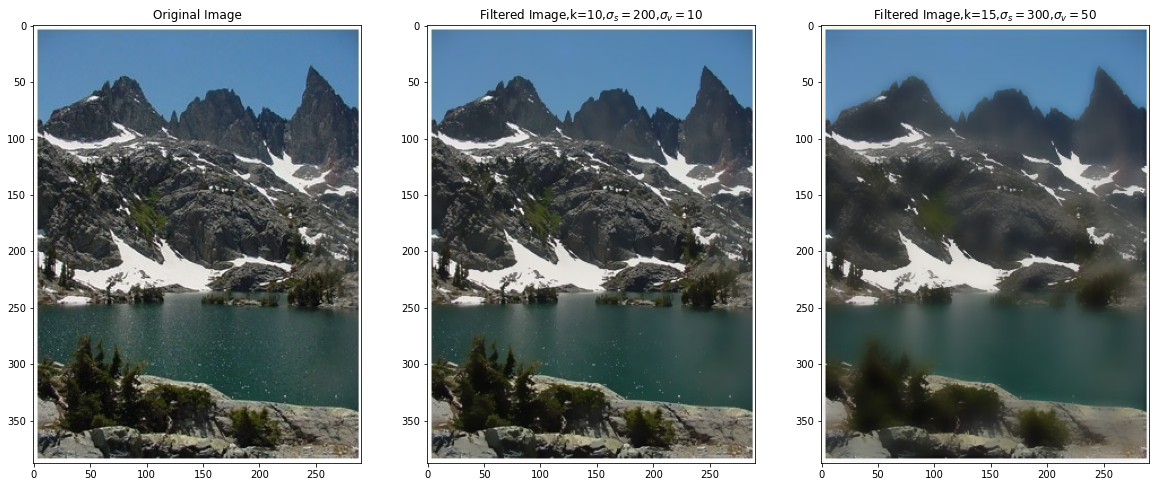

In [5]:
plt.figure(figsize = (20,15))

plt.subplot(131)
plt.imshow(mountain)
plt.title('Original Image')
plt.subplot(132)
plt.imshow(filtered_1)
plt.title(r'Filtered Image,k=10,$\sigma_s =200$,$\sigma_v =10$')
plt.subplot(133)
plt.imshow(filtered_2)
plt.title(r'Filtered Image,k=15,$\sigma_s =300$,$\sigma_v =50$')


plt.show()

## Part 3

In [6]:
def cross_bilateral_filter(img,img_flash,k,sigma_d,sigma_r):

    h,w,_ = img.shape
    
    output = np.zeros([h,w,3])
    
    padding_img = np.zeros([h+k-1,w+k-1,3],dtype='int64')
    padding_img[int((k-1)/2):int(h+(k-1)/2),int((k-1)/2):int(w+(k-1)/2),0:3] = img
    padding_img_flash = np.zeros([h+k-1,w+k-1,3],dtype='int64')
    padding_img_flash[int((k-1)/2):int(h+(k-1)/2),int((k-1)/2):int(w+(k-1)/2),0:3] = img_flash
    
    spatial_kernel = np.zeros([k,k])
    
    center = int((k-1)/2)
    for i in range(k):
        for j in range(k):
            spatial_kernel[i][j] = np.exp(-(((i - center)**2 + (j-center)**2) / (2 * sigma_d * sigma_d)))
    
    for i in range(int((k-1)/2),h+int((k-1)/2)):
        for j in range(int((k-1)/2),w+int((k-1)/2)):     
            for layer in range(3):
                area_obs = padding_img_flash[i-int((k-1)/2):i+int((k-1)/2)+1,j-int((k-1)/2):j+int((k-1)/2)+1,layer:layer+1].reshape(k,k)                
                value_kernel = padding_img[i-int((k-1)/2):i+int((k-1)/2)+1,j-int((k-1)/2):j+int((k-1)/2)+1,layer:layer+1].reshape(k,k) - padding_img_flash[i][j][layer]
                value_kernel = np.exp(-(value_kernel*value_kernel)/(2*sigma_r*sigma_r))
                
                denominator = spatial_kernel * value_kernel
                numerator = area_obs*denominator

                output[i-int((k-1)/2)][j-int((k-1)/2)][layer] = int(sum(sum(numerator)) / sum(sum(denominator)))

    return np.int64(output)

In [7]:
flash = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'cake_flash.jpg'))
flash = cv2.cvtColor(flash,cv2.COLOR_BGR2RGB)

noflash = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'cake_noflash.jpg'))
noflash = cv2.cvtColor(noflash,cv2.COLOR_BGR2RGB)

out = cross_bilateral_filter(noflash,flash,15,400, 50)

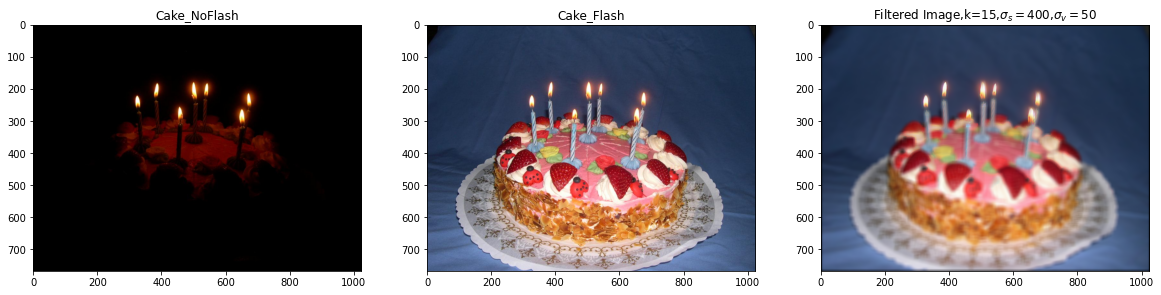

In [8]:
plt.figure(figsize = (20,15))

plt.subplot(131)
plt.imshow(noflash)
plt.title('Cake_NoFlash')
plt.subplot(132)
plt.imshow(flash)
plt.title('Cake_Flash')
plt.subplot(133)
plt.imshow(out)
plt.title(r'Filtered Image,k=15,$\sigma_s =400$,$\sigma_v =50$')
plt.show()

In [9]:
out = cross_bilateral_filter(noflash,flash,11,1200, 20)

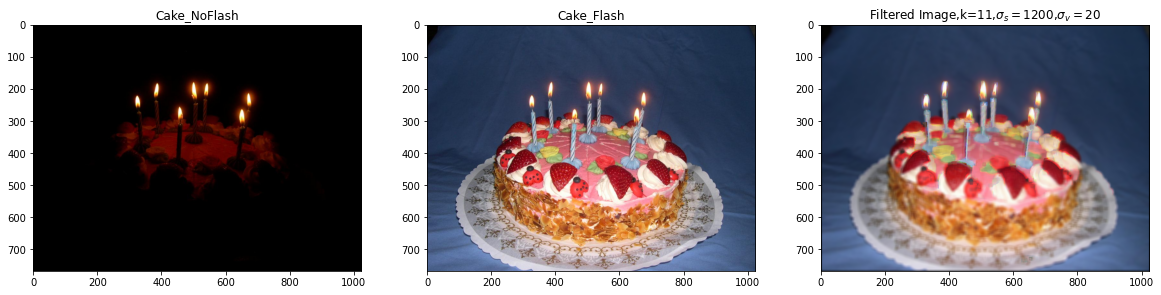

In [10]:
plt.figure(figsize = (20,15))

plt.subplot(131)
plt.imshow(noflash)
plt.title('Cake_NoFlash')
plt.subplot(132)
plt.imshow(flash)
plt.title('Cake_Flash')
plt.subplot(133)
plt.imshow(out)
plt.title(r'Filtered Image,k=11,$\sigma_s =1200$,$\sigma_v =20$')
plt.show()

In [11]:
out = cross_bilateral_filter(noflash,flash,11,2000, 20)

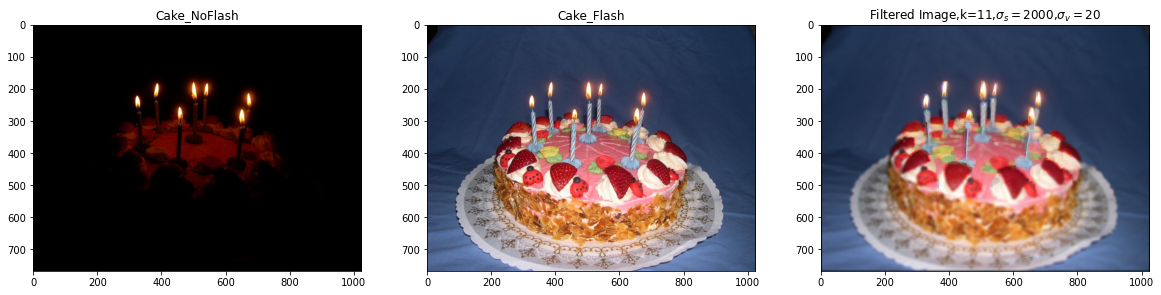

In [12]:
plt.figure(figsize = (20,15))

plt.subplot(131)
plt.imshow(noflash)
plt.title('Cake_NoFlash')
plt.subplot(132)
plt.imshow(flash)
plt.title('Cake_Flash')
plt.subplot(133)
plt.imshow(out)
plt.title(r'Filtered Image,k=11,$\sigma_s =2000$,$\sigma_v =20$')
plt.show()

In [13]:
out = cross_bilateral_filter(noflash,flash,7,1200, 15)

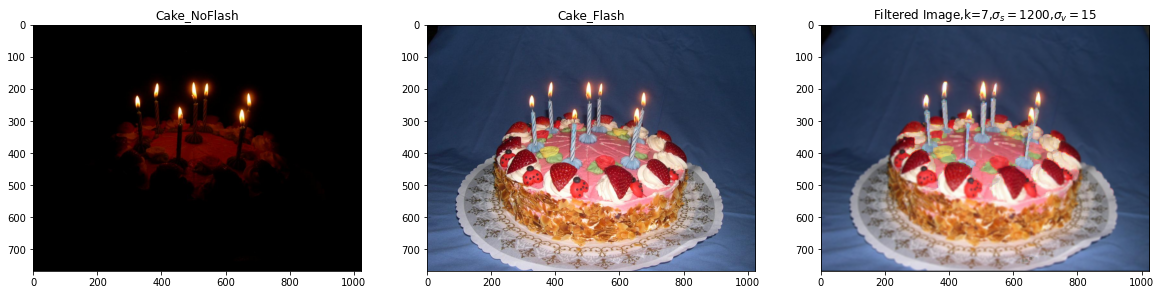

In [14]:
plt.figure(figsize = (20,15))

plt.subplot(131)
plt.imshow(noflash)
plt.title('Cake_NoFlash')
plt.subplot(132)
plt.imshow(flash)
plt.title('Cake_Flash')
plt.subplot(133)
plt.imshow(out)
plt.title(r'Filtered Image,k=7,$\sigma_s =1200$,$\sigma_v =15$')
plt.show()

In [15]:
out = cross_bilateral_filter(noflash,flash,7,15, 500)

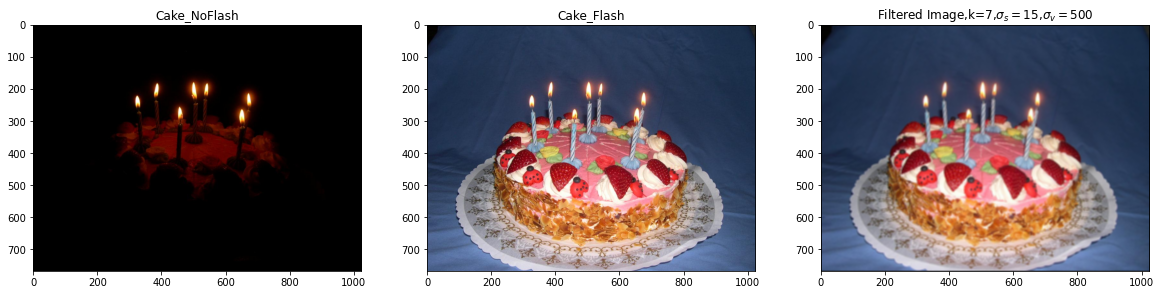

In [16]:
plt.figure(figsize = (20,15))

plt.subplot(131)
plt.imshow(noflash)
plt.title('Cake_NoFlash')
plt.subplot(132)
plt.imshow(flash)
plt.title('Cake_Flash')
plt.subplot(133)
plt.imshow(out)
plt.title(r'Filtered Image,k=7,$\sigma_s =15$,$\sigma_v =500$')
plt.show()

In [17]:
out = cross_bilateral_filter(noflash,flash,11,15, 1200)

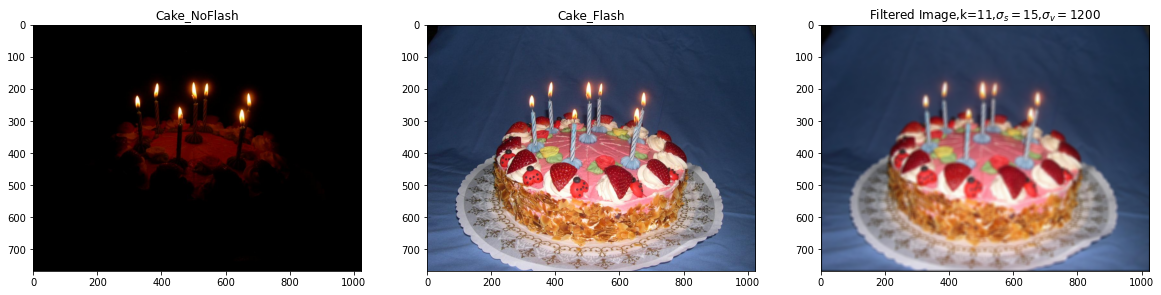

In [18]:
plt.figure(figsize = (20,15))

plt.subplot(131)
plt.imshow(noflash)
plt.title('Cake_NoFlash')
plt.subplot(132)
plt.imshow(flash)
plt.title('Cake_Flash')
plt.subplot(133)
plt.imshow(out)
plt.title(r'Filtered Image,k=11,$\sigma_s =15$,$\sigma_v =1200$')
plt.show()